#### Solução simples para web scrapping e geração de word cloud.

De forma simplificada, esta solução busca o texto de um artigo online e gera a nuvem de palavras enfatizando os termos que mais aparecem no texto.

Para esta solução foram utilizados: *urllib*, *BeautifulSoup*, *WordCloud*, *nltk*, *matplotlib*.

Utilizando o Anaconda como IDE, a instalação dos pacotes foi realizada com os comandos abaixo:
* conda install beautifulsoup4.
* conda install -c conda-forge wordcloud

In [1]:
# Importação dos pacotes
from urllib.request import urlopen
from bs4 import BeautifulSoup
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Download da página que contém o artigo
html = urlopen("http://cio.com.br/opiniao/2018/07/05/a-inteligencia-artificial-esta-perto-do-seu-ponto-de-inflexao/")
# Criação do objeto
res = BeautifulSoup(html.read(),"html5lib")
# Busca pelo conteúdo na div texto
tags = res.findAll("div", {"class": "texto"})
texto = ""
# Removendo as tags html do texto
for tag in tags:
    #print(tag.getText())
    texto += tag.getText()
#print(texto)

In [3]:
# Salvando as stopwords em portugês
stopwords = nltk.corpus.stopwords.words('portuguese')
#stopwords

In [4]:
# Função para remover as stopwords do texto e eliminando os parágrafos
def RemoverStopWords(texto):
    texto = texto.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in texto.split() if not i in stopwords]
    return (" ".join(palavras))

In [5]:
# Chamada à função
texto2 = RemoverStopWords(texto)
#texto2

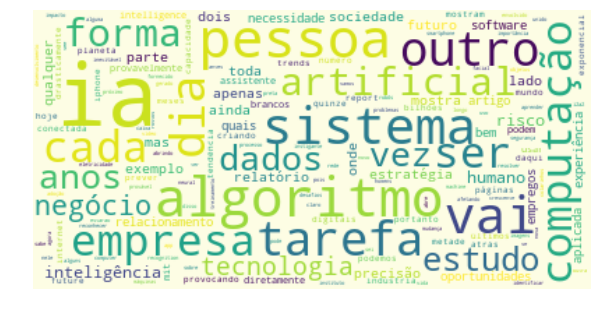

In [6]:
# Montagem da wordcloud
wc = WordCloud(collocations=False,
              background_color="#FDFDE4")
wc.generate(texto2)
# Plotando a wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Artigo utilizado:

#### A Inteligência Artificial está perto do seu ponto de inflexão (Cezar Taurion).
* http://cio.com.br/opiniao/2018/07/05/a-inteligencia-artificial-esta-perto-do-seu-ponto-de-inflexao/

### Referências:

* https://imasters.com.br/back-end/como-fazer-web-scraping-com-python
* https://github.com/amueller/word_cloud
* http://minerandodados.com.br/index.php/2017/06/22/mineracao-de-textos-7-tecnicas/